<a href="https://colab.research.google.com/github/rippedtuco/image_processing/blob/main/8_bit_to_multiple_converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Example.jpg to Example.jpg
[255 255 255]


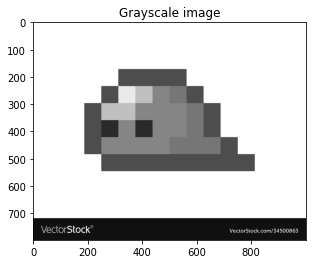

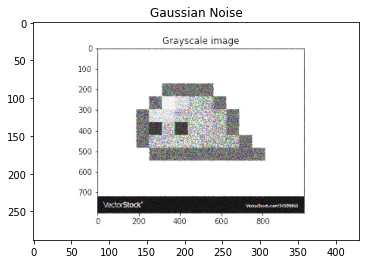

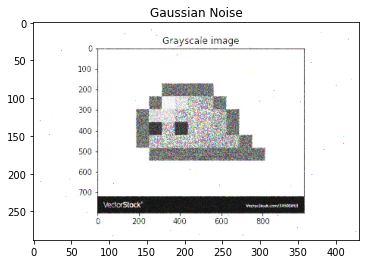

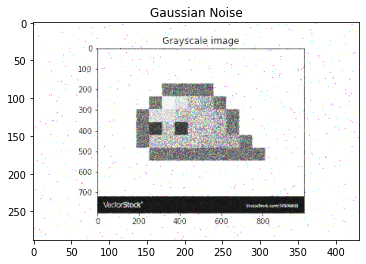

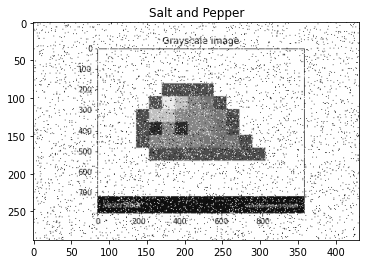

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in ubyte_scalars


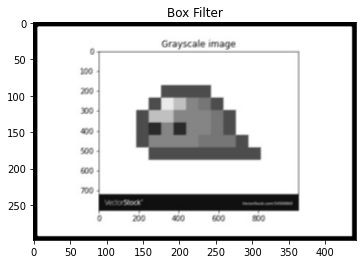

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: RuntimeWarning: overflow encountered in ubyte_scalars


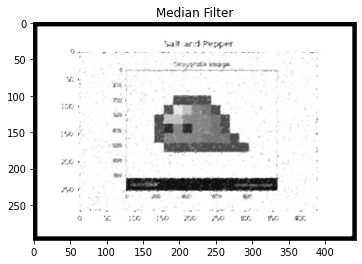

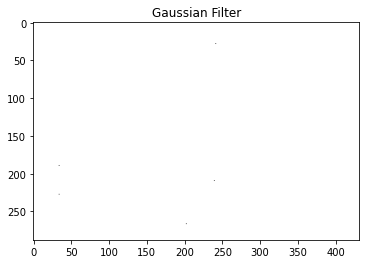

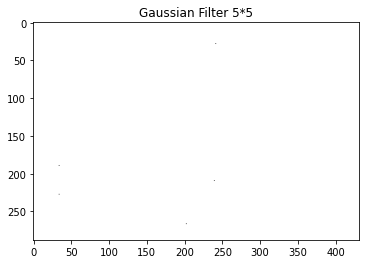

In [1]:
from numpy.ma.extras import median
from numpy.ma.core import mean
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
import numpy as np
import random
import operator

def eightbit_To_Grayscale(img):
 R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
 imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
 plt.imshow(imgGray, cmap='gray')
 plt.title('Grayscale image')
 plt.savefig('Example_1.jpg')
 plt.show()
 plt.close()

def add_gaussian_noise(standdev, img):
 sigma=np.sqrt(standdev/100)
 gauss=np.random.normal(1,scale=sigma,size=img.shape)
 gauss=gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('int32')
 noise=img+img*gauss
 plt.imshow(noise)
 plt.title('Gaussian Noise')
 plt.savefig('Example_2.jpg')
 plt.show()
 plt.close()

def grayscale_To_s_and_p(img):
  col=img.shape[0]
  row=img.shape[1]
  ttlpix=(img.shape[0]*img.shape[1])
  spix=int(ttlpix/10)
  ppix=int(ttlpix/30)

  for i in range(0,spix):
   y_crd=random.randint(0,col-1)
   x_crd=random.randint(0,row-1)
   img[y_crd][x_crd] = 255

  for i in range(0,ppix):
   y_crd=random.randint(0,col-1)
   x_crd=random.randint(0,row-1)
   img[y_crd][x_crd]=0
  
  return img

def box_Filter_Blur(img):
  #this takes care of the edges of the image
  offset=5
  img_pad=np.pad(img,((offset,offset),(offset,offset),(0,0)),mode='constant')
  img_z=np.zeros(img_pad.shape)
  for k in range(3):
    for x in range(offset+1,img_pad.shape[0]-offset):
        for y in range(offset+1,img_pad.shape[1]-offset):
          if (x==offset+1 and y==offset+1): 
            cellx=(img_pad[x,y,k]+img_pad[x+1,y,k]+img_pad[x,y+1,k]+img_pad[x+1,y+1,k])/9.0
            img_z[x][y][k]=int(cellx)
          elif ((x==img_pad.shape[0]-(offset+1)) and y==offset+1):
            cellx=(img_pad[x,y,k]+img_pad[x,y+1,k]+img_pad[x-1,y,k]+img_pad[x-1,y+1,k])/9.0
            img_z[x][y][k]=int(cellx)
          elif (x==offset+1 and (y==img_pad.shape[1]-(offset+1))):
            cellx=(img_pad[x,y,k]+img_pad[x,y-1,k]+img_pad[x+1,y,k]+img_pad[x+1,y-1,k])/9.0
            img_z[x][y][k]=int(cellx)
          elif ((x==img_pad.shape[0]-(offset+1)) and (y==img_pad.shape[1]--(offset+1))):
            cellx=(img_pad[x,y,k]+img_pad[x,y-1,k]+img_pad[x-1,y,k]+img_pad[x-1,y-1,k])/9.0
            img_z[x][y][k]=int(cellx)
          else:
            cellx=sum((img_pad[x-1,y+1,k],img_pad[x,y+1,k],img_pad[x-1,y+1,k],img_pad[x-1,y,k],img_pad[x,y,k],img_pad[x+1,y,k],img_pad[x-1,y-1,k],img_pad[x,y-1,k],img_pad[x+1,y-1,k]))/9.0
            img_z[x][y][k]=int(cellx)
  img_z=img_z.astype(int)
  return img_z

def median_Filter_Blur(img):
  #this takes care of the edges of the image
  offset=5
  img_pad=np.pad(img,((offset,offset),(offset,offset),(0,0)),mode='constant')
  img_z=np.zeros(img_pad.shape)
  for k in range(3):
    for x in range(offset+1,img_pad.shape[0]-offset):
        for y in range(offset+1,img_pad.shape[1]-offset):
          if (x==offset+1 and y==offset+1): 
            cellx=median((img_pad[x,y,k]+img_pad[x+1,y,k]+img_pad[x,y+1,k]+img_pad[x+1,y+1,k]))
            img_z[x][y][k]=int(cellx)
          elif ((x==img_pad.shape[0]-(offset+1)) and y==offset+1):
            cellx=median((img_pad[x,y,k]+img_pad[x,y+1,k]+img_pad[x-1,y,k]+img_pad[x-1,y+1,k]))
            img_z[x][y][k]=int(cellx)
          elif (x==offset+1 and (y==img_pad.shape[1]-(offset+1))):
            cellx=median((img_pad[x,y,k]+img_pad[x,y-1,k]+img_pad[x+1,y,k]+img_pad[x+1,y-1,k]))
            img_z[x][y][k]=int(cellx)
          elif ((x==img_pad.shape[0]-(offset+1)) and (y==img_pad.shape[1]--(offset+1))):
            cellx=median((img_pad[x,y,k]+img_pad[x,y-1,k]+img_pad[x-1,y,k]+img_pad[x-1,y-1,k]))
            img_z[x][y][k]=int(cellx)
          else:
            cellx=median((img_pad[x-1,y+1,k],img_pad[x,y+1,k],img_pad[x-1,y+1,k],img_pad[x-1,y,k],img_pad[x,y,k],img_pad[x+1,y,k],img_pad[x-1,y-1,k],img_pad[x,y-1,k],img_pad[x+1,y-1,k]))
            img_z[x][y][k]=int(cellx)
  img_z=img_z.astype(int)
  return img_z

def gauss_Filter(img,kernelx):
  r=img.shape[0]
  c=img.shape[1]
  m,n=kernelx.shape
  pad_im=np.zeros((r+m-1,c+n-1))
  m=m//2
  n=n//2
  img_z=np.zeros(img.shape)
  pad_im[m:pad_im.shape[0]-m, n:pad_im.shape[1]-n]=img[:,:,0]
  for x in range(m,pad_im.shape[0]-m):
        for y in range(n,pad_im.shape[1]-n):
          temp=pad_im[x-m:x+m+1,y-n:y+n+1]
          result=temp*kernelx
          img_z[x-m,y-n]=result.sum()
  return img_z

def GS (r, c, sd):
  gaussi=np.zeros((r,c))
  r=r//2
  c=c//2
  for x in range(-r,r+1):
    for y in range(-c,c+1):
      denom=(2*np.pi)*(sd**2)
      num=np.exp(-(x**2+y**2)/(2*sd**2))
      gaussi[x+r,y+c]=(1/denom)*num
  return gaussi

uploaded=files.upload()
img = mpimg.imread('Example.jpg')
print(img[0,1])
eightbit_To_Grayscale(img)

img_x= mpimg.imread('Example_1.jpg')
add_gaussian_noise(10,img_x)

img_x= mpimg.imread('Example_1.jpg')
add_gaussian_noise(30,img_x)

img_x= mpimg.imread('Example_1.jpg')
add_gaussian_noise(50,img_x)

img_y = mpimg.imread('Example_1.jpg').astype('int32')
plt.imshow(grayscale_To_s_and_p(img_y))
plt.title('Salt and Pepper')
plt.savefig('Example_3.jpg')
plt.show()

img_z = mpimg.imread('Example_1.jpg')
plt.imshow(box_Filter_Blur(img_z))
plt.title('Box Filter')
plt.savefig('Example_4.jpg')
plt.show()

img_m = mpimg.imread('Example_3.jpg')
plt.imshow(median_Filter_Blur(img_m))
plt.title('Median Filter')
plt.savefig('Example_5.jpg')
plt.show()

img_n = mpimg.imread('Example_2.jpg')
g=GS(3,3,0.1)
plt.imshow(gauss_Filter(img_n,g))
plt.title('Gaussian Filter')
plt.savefig('Example_6.jpg')
plt.show()

img_0 = mpimg.imread('Example_2.jpg')
g=GS(5,5,0.1)
plt.imshow(gauss_Filter(img_n,g))
plt.title('Gaussian Filter 5*5')
plt.savefig('Example_7.jpg')
plt.show()